<a href="https://colab.research.google.com/github/hamisB/machine-learning/blob/master/TED_Transcript_EDA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT LIBRAIRIES & DATASET

---



In [0]:
# import librairies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight") 
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import ast
%matplotlib inline
import pandas_profiling as pp
import matplotlib.pyplot as plt

In [0]:
# Get data
data = pd.read_csv('https://storage.googleapis.com/source_market_fr/data_for_ml/ted_main.csv')
transcript = pd.read_csv('https://storage.googleapis.com/source_market_fr/data_for_ml/transcripts.csv')

In [122]:
# Fixing url as index and merge the two sub dataset
data.set_index('url', inplace=True)
transcript.set_index('url', inplace=True)
dataset = data.merge(transcript , left_index=True, right_index=True)
dataset.head(1)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,views,transcript
url,,,,,,,,,,,,,,,,,
https://www.ted.com/talks/9_11_healing_the_mothers_who_found_forgiveness_friendship\n,149,Phyllis Rodriguez and Aicha el-Wafi have a pow...,594,TEDWomen 2010,1292112000,32,Aicha el-Wafi + Phyllis Rodriguez,Aicha el-Wafi + Phyllis Rodriguez: The mothers...,1,1304362260,"[{'id': 10, 'name': 'Inspiring', 'count': 385}...","[{'id': 968, 'hero': 'https://pe.tedcdn.com/im...",9/11 mothers,"['culture', 'friendship', 'global issues', 'pa...","The mothers who found forgiveness, friendship",820976,Phyllis Rodriguez: We are here today because o...


In [123]:
# EDA
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2467 entries, https://www.ted.com/talks/9_11_healing_the_mothers_who_found_forgiveness_friendship
 to https://www.ted.com/talks/zubaida_bai_a_simple_birth_kit_for_mothers_in_the_developing_world

Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2467 non-null   int64 
 1   description         2467 non-null   object
 2   duration            2467 non-null   int64 
 3   event               2467 non-null   object
 4   film_date           2467 non-null   int64 
 5   languages           2467 non-null   int64 
 6   main_speaker        2467 non-null   object
 7   name                2467 non-null   object
 8   num_speaker         2467 non-null   int64 
 9   published_date      2467 non-null   int64 
 10  ratings             2467 non-null   object
 11  related_talks       2467 non-null   object
 12  speaker_occupation  2461 non-null   object
 13  t

## TED TALKS TRENDING

---



---



In [0]:
# Convert the columns 'published_date' & 'film_date' to datetime 
datetime.fromtimestamp(1292112000).strftime("%Y-%m-%d ")
dataset['published_date_'] = dataset['published_date'].apply( lambda x: datetime.fromtimestamp(x).strftime("%Y-%m-%d"))
dataset['film_date_'] = dataset['film_date'].apply( lambda x: datetime.fromtimestamp(x).strftime("%Y-%m-%d"))
dataset['published_ym'] = dataset['published_date'].apply( lambda x: datetime.fromtimestamp(x).strftime("%Y-%m"))
dataset['film_ym'] = dataset['film_date'].apply( lambda x: datetime.fromtimestamp(x).strftime("%Y-%m"))
dataset['published_y'] = dataset['published_date'].apply( lambda x: datetime.fromtimestamp(x).strftime("%Y"))
dataset['film_y'] = dataset['film_date'].apply( lambda x: datetime.fromtimestamp(x).strftime("%Y"))

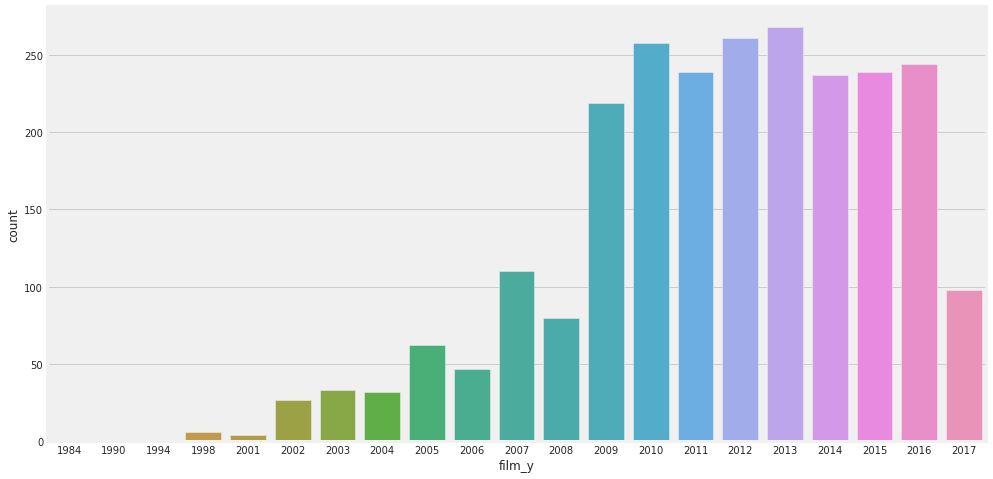

In [125]:
# Trend of Ted Talks Film each year
plt.figure(figsize=(15,8))
sns.countplot(x='film_y', data=dataset.sort_values('film_y', ascending=False))

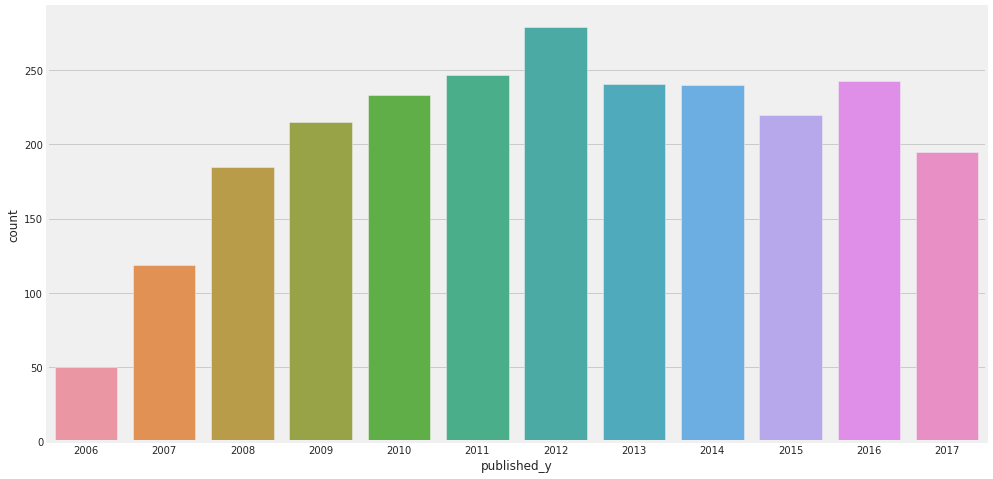

In [126]:
# Trend of Ted Talks Published each year
plt.figure(figsize=(15,8))
sns.countplot(x='published_y', data=dataset.sort_values('published_y', ascending=False)) 

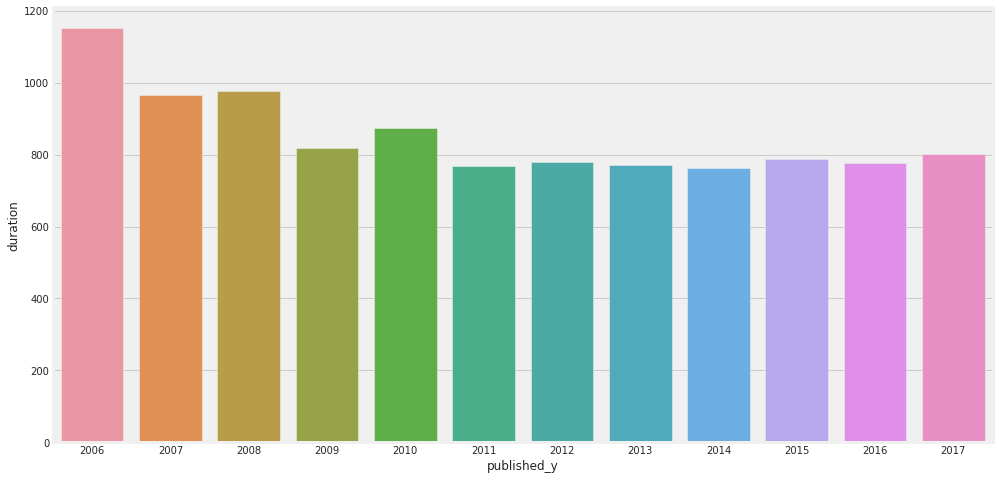

In [127]:
# Average duration of Ted Talks over the year 
plt.figure(figsize=(15,8))
sns.barplot(x="published_y", y="duration", data=dataset.groupby('published_y').duration.mean().reset_index().sort_values('published_y') , orient='v')

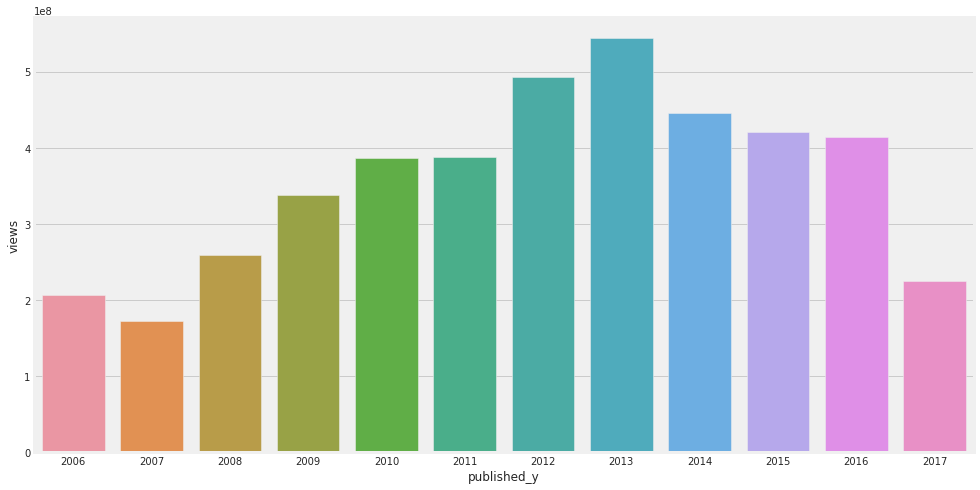

In [128]:
# Number of view over the year 
plt.figure(figsize=(15,8))
sns.barplot(x="published_y", y="views", data=dataset.groupby('published_y').views.sum().reset_index().sort_values('published_y') , orient='v')

<Figure size 720x720 with 0 Axes>

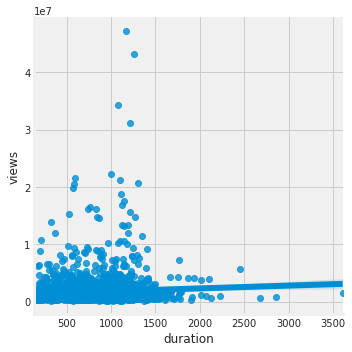

In [129]:
# Scatter Plot Duration and Views
plt.figure(figsize=(10,10))
sns.lmplot(x='duration', y='views', data=dataset)

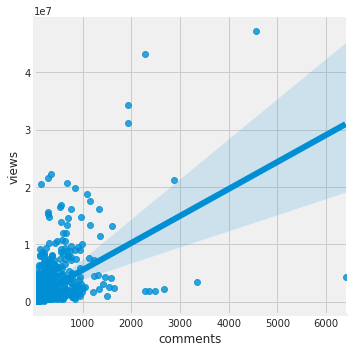

In [130]:
# Scatter Plot Comments and Views
sns.lmplot(x='comments', y='views', data=dataset)

## TED TALKS RATINGS

---



In [131]:
# Getting every ratings in columns 
dataset['ratings'] = dataset['ratings'].apply(lambda x: ast.literal_eval(x))
dataset['ratings']

url
https://www.ted.com/talks/9_11_healing_the_mothers_who_found_forgiveness_friendship\n                [{'id': 10, 'name': 'Inspiring', 'count': 385}...
https://www.ted.com/talks/a_j_jacobs_year_of_living_biblically\n                                     [{'id': 22, 'name': 'Fascinating', 'count': 53...
https://www.ted.com/talks/a_robot_that_flies_like_a_bird\n                                           [{'id': 23, 'name': 'Jaw-dropping', 'count': 1...
https://www.ted.com/talks/a_ted_speaker_s_worst_nightmare\n                                          [{'id': 2, 'name': 'Confusing', 'count': 186},...
https://www.ted.com/talks/a_whistleblower_you_haven_t_heard\n                                        [{'id': 23, 'name': 'Jaw-dropping', 'count': 2...
                                                                                                                           ...                        
https://www.ted.com/talks/zeynep_tufekci_machine_intelligence_makes_human_morals_more_impo

In [0]:
# Get all the ratings in a list 
rating = []
for info in dataset['ratings'].values: 
    rating.append(info)

In [0]:
# Get ratings
funny = []
beautiful = []
ingenious = []
courageous = []
longwinded = []
confusing = []
informative = []
fascinating = []
unconvincing = []
persuavice = []
jaw_droping = []
ok = []
obnoxious = []
inspiring = []

for info in rating: 
    
    for x in range(0,14):
        
        if info[x]['name']=='Funny':
            funny.append(info[x]['count'])
        
        if info[x]['name']=='Beautiful':
            beautiful.append(info[x]['count'])        
        
        if info[x]['name']=='Ingenious':
            ingenious.append(info[x]['count'])
        
        if info[x]['name']=='Courageous':
            courageous.append(info[x]['count'])
        
        if info[x]['name']=='Longwinded':
            longwinded.append(info[x]['count'])
        
        if info[x]['name']=='Confusing':
            confusing.append(info[x]['count'])
        
        if info[x]['name']=='Informative':
            informative.append(info[x]['count'])

        if info[x]['name']=='Fascinating':
            fascinating.append(info[x]['count'])
    
        if info[x]['name']=='Unconvincing':
            unconvincing.append(info[x]['count'])
        
        if info[x]['name']=='Persuasive':
            persuavice.append(info[x]['count'])
        
        if info[x]['name']=='Jaw-dropping':
            jaw_droping.append(info[x]['count'])
        
        if info[x]['name']=='OK':
            ok.append(info[x]['count'])
        
        if info[x]['name']=='Obnoxious':
            obnoxious.append(info[x]['count'])
        
        if info[x]['name']=='Inspiring':
            inspiring.append(info[x]['count'])       
        

In [0]:
# Add more column to the dataFrame
dataset['funny'] = funny
dataset['beautiful'] = beautiful
dataset['ingenious'] = ingenious 
dataset['courageous'] = courageous
dataset['longwinded'] = longwinded
dataset['confusing'] = confusing
dataset['informative'] = informative
dataset['fascinating'] = fascinating
dataset['unconvincing'] = unconvincing
dataset['persuavice'] = persuavice
dataset['jaw_droping'] = jaw_droping
dataset['ok'] = ok
dataset['obnoxious'] = obnoxious
dataset['inspiring'] = inspiring

In [135]:
# Top most fascinating Ted Talks 
dataset[['title','fascinating','published_y']].head(10).sort_values('fascinating',ascending=False)

,title,fascinating,published_y
url,,,
https://www.ted.com/talks/aaron_o_connell_making_sense_of_a_visible_quantum_object\n,Making sense of a visible quantum object,1347,2011
https://www.ted.com/talks/a_robot_that_flies_like_a_bird\n,A robot that flies like a bird,1197,2011
https://www.ted.com/talks/aaron_koblin\n,Visualizing ourselves ... with crowd-sourced data,618,2011
https://www.ted.com/talks/a_j_jacobs_year_of_living_biblically\n,My year of living biblically,531,2008
https://www.ted.com/talks/a_whistleblower_you_haven_t_heard\n,A whistleblower you haven't heard,207,2011
https://www.ted.com/talks/aaron_huey\n,America's native prisoners of war,129,2010
https://www.ted.com/talks/aakash_odedra_a_dance_in_a_hurricane_of_paper_wind_and_light\n,"A dance in a hurricane of paper, wind and light",105,2014
https://www.ted.com/talks/a_ted_speaker_s_worst_nightmare\n,A TED speaker's worst nightmare,82,2012
https://www.ted.com/talks/aala_el_khani_what_it_s_like_to_be_a_parent_in_a_war_zone\n,What it's like to be a parent in a war zone,38,2017


In [136]:
# Top most beautiful Ted Talks 
dataset[['title','beautiful','published_y']].head(10).sort_values('beautiful',ascending=False)

,title,beautiful,published_y
url,,,
https://www.ted.com/talks/a_robot_that_flies_like_a_bird\n,A robot that flies like a bird,630,2011
https://www.ted.com/talks/aaron_koblin\n,Visualizing ourselves ... with crowd-sourced data,448,2011
https://www.ted.com/talks/aakash_odedra_a_dance_in_a_hurricane_of_paper_wind_and_light\n,"A dance in a hurricane of paper, wind and light",423,2014
https://www.ted.com/talks/a_whistleblower_you_haven_t_heard\n,A whistleblower you haven't heard,244,2011
https://www.ted.com/talks/9_11_healing_the_mothers_who_found_forgiveness_friendship\n,"The mothers who found forgiveness, friendship",229,2011
https://www.ted.com/talks/aaron_huey\n,America's native prisoners of war,174,2010
https://www.ted.com/talks/a_ted_speaker_s_worst_nightmare\n,A TED speaker's worst nightmare,168,2012
https://www.ted.com/talks/aaron_o_connell_making_sense_of_a_visible_quantum_object\n,Making sense of a visible quantum object,91,2011
https://www.ted.com/talks/aala_el_khani_what_it_s_like_to_be_a_parent_in_a_war_zone\n,What it's like to be a parent in a war zone,70,2017


In [137]:

# Top most beautiful Ted Talks 
dataset[['title','inspiring','published_y']].head(10).sort_values('inspiring',ascending=False)


,title,inspiring,published_y
url,,,
https://www.ted.com/talks/a_robot_that_flies_like_a_bird\n,A robot that flies like a bird,721,2011
https://www.ted.com/talks/aaron_huey\n,America's native prisoners of war,618,2010
https://www.ted.com/talks/aaron_koblin\n,Visualizing ourselves ... with crowd-sourced data,570,2011
https://www.ted.com/talks/a_j_jacobs_year_of_living_biblically\n,My year of living biblically,422,2008
https://www.ted.com/talks/9_11_healing_the_mothers_who_found_forgiveness_friendship\n,"The mothers who found forgiveness, friendship",385,2011
https://www.ted.com/talks/aaron_o_connell_making_sense_of_a_visible_quantum_object\n,Making sense of a visible quantum object,261,2011
https://www.ted.com/talks/aala_el_khani_what_it_s_like_to_be_a_parent_in_a_war_zone\n,What it's like to be a parent in a war zone,160,2017
https://www.ted.com/talks/aakash_odedra_a_dance_in_a_hurricane_of_paper_wind_and_light\n,"A dance in a hurricane of paper, wind and light",89,2014
https://www.ted.com/talks/a_whistleblower_you_haven_t_heard\n,A whistleblower you haven't heard,83,2011


In [138]:
# Prepare dataset for PCA Analysis
pca_df = dataset[['funny','beautiful','ingenious','courageous','longwinded','confusing','informative','fascinating','unconvincing','persuavice','jaw_droping','ok','obnoxious','inspiring']]
pca_df.head()

,funny,beautiful,ingenious,courageous,longwinded,confusing,informative,fascinating,unconvincing,persuavice,jaw_droping,ok,obnoxious,inspiring
url,,,,,,,,,,,,,,
https://www.ted.com/talks/9_11_healing_the_mothers_who_found_forgiveness_friendship\n,2,229,10,338,7,8,24,26,25,30,37,20,13,385
https://www.ted.com/talks/a_j_jacobs_year_of_living_biblically\n,936,50,250,345,105,52,376,531,150,130,45,219,116,422
https://www.ted.com/talks/a_robot_that_flies_like_a_bird\n,110,630,1333,59,24,16,260,1197,20,73,1487,119,13,721
https://www.ted.com/talks/a_ted_speaker_s_worst_nightmare\n,1423,168,211,69,34,186,12,82,103,9,81,170,221,65
https://www.ted.com/talks/a_whistleblower_you_haven_t_heard\n,175,244,49,14,38,4,4,207,11,5,216,44,30,83


In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pca_scaler = scaler.fit_transform(pca_df)

In [140]:
pca = PCA(n_components=2)
print(pca.fit_transform(pca_scaler))
print(pca.explained_variance_ratio_)

[[-1.19800055 -0.37866619]
 [ 2.09452702  2.23693174]
 [ 1.99392064 -1.98781869]
 ...
 [ 1.06147089  1.33562299]
 [-1.24170786 -0.16214179]
 [-1.61223497 -0.58437902]]
[0.46510307 0.14948046]


In [141]:
# Components explaination
pd.DataFrame(pca.components_, columns=pca_df.columns)

,funny,beautiful,ingenious,courageous,longwinded,confusing,informative,fascinating,unconvincing,persuavice,jaw_droping,ok,obnoxious,inspiring
0,0.228043,0.246648,0.257559,0.244613,0.262888,0.239477,0.312262,0.334283,0.202594,0.317825,0.212144,0.301954,0.192583,0.331588
1,-0.110653,-0.212242,-0.189091,-0.135294,0.301948,0.391623,-0.145605,-0.196237,0.500162,-0.091526,-0.183595,0.135243,0.479833,-0.208860


In [142]:
# Fit a PCA with 2 components
pca_data = dataset[['title']].merge(pd.DataFrame(pca.fit_transform(pca_scaler) , index=dataset.index , columns=['PC1','PC2']), right_index=True, left_index=True )
pca_data.head(10)

,title,PC1,PC2
url,,,
https://www.ted.com/talks/9_11_healing_the_mothers_who_found_forgiveness_friendship\n,"The mothers who found forgiveness, friendship",-1.198001,-0.378666
https://www.ted.com/talks/a_j_jacobs_year_of_living_biblically\n,My year of living biblically,2.094527,2.236934
https://www.ted.com/talks/a_robot_that_flies_like_a_bird\n,A robot that flies like a bird,1.993921,-1.987822
https://www.ted.com/talks/a_ted_speaker_s_worst_nightmare\n,A TED speaker's worst nightmare,2.221444,4.268753
https://www.ted.com/talks/a_whistleblower_you_haven_t_heard\n,A whistleblower you haven't heard,-0.936729,-0.110927
https://www.ted.com/talks/aakash_odedra_a_dance_in_a_hurricane_of_paper_wind_and_light\n,"A dance in a hurricane of paper, wind and light",-0.489795,0.572196
https://www.ted.com/talks/aala_el_khani_what_it_s_like_to_be_a_parent_in_a_war_zone\n,What it's like to be a parent in a war zone,-1.430026,-0.499679
https://www.ted.com/talks/aaron_huey\n,America's native prisoners of war,1.255492,-0.519828
https://www.ted.com/talks/aaron_koblin\n,Visualizing ourselves ... with crowd-sourced data,0.393316,-0.246796


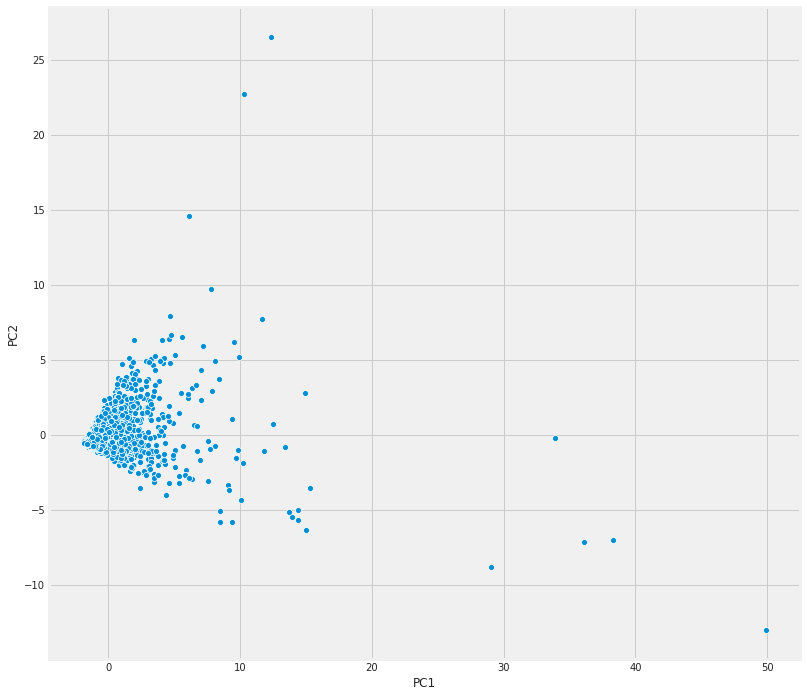

In [143]:
# Scatterplot PCA componets and Cluster
plt.figure(figsize=(12,12)) 
sns.scatterplot(data=pca_data, x='PC1', y='PC2')